<a href="https://colab.research.google.com/github/eminshall/Predictive-Analytics/blob/main/NYC_AirBnb_Data_Science_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.3-cp313-cp313-manylinux_2_24_x86_64.manylinux_2_28_x86_64.whl.metadata (91 kB)
  Using cached numpy-2.3.4-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 7.0 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 10.0 MB/s eta 0:00:00m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 8.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01m
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 9.5 

# 1.0 Data Wrangling

## 1.1 Objectives

Pick an Apartment in NYC renting out for Airbnb. Then create a model to predict price to help create justification for raising prices, lowering prices, and what features in the existing airbnb will justify raising prices. They'd also like to predict the price for a theoretical apartment in different neighborhoods to see if it justifies the real estate costs of investment.

### 1.1.1 Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import datetime
import pickle
from sklearn import __version__ as sklearn_version

import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## 1.2 Load Data

In [ ]:
import kagglehub

path = kagglehub.dataset_download("dgomonov/new-york-city-airbnb-open-data")

csv_file_path = os.path.join(path, 'AB_NYC_2019.csv')
df = pd.read_csv(csv_file_path)

Using Colab cache for faster access to the 'new-york-city-airbnb-open-data' dataset.


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## 1.3 Explore Data

### 1.3.1 Feature of Interest

In [ ]:
df['host_id'].sample().T

,host_id
39961,163035332


In [ ]:
df[df['host_id'] == 163035332].T

,39471,39961,40412
id,30754138,31052910,31325866
name,Prime Soho apartment with private backyard,GORGEOUS PRIME SOHO 3 BEDROOMS PENTHOUSE,Amazing Soho Apartments with Private Backyard
host_id,163035332,163035332,163035332
host_name,Pirin,Pirin,Pirin
neighbourhood_group,Manhattan,Manhattan,Manhattan
neighbourhood,SoHo,SoHo,SoHo
latitude,40.72199,40.72267,40.72273
longitude,-74.00444,-74.00334,-74.00479
room_type,Entire home/apt,Entire home/apt,Entire home/apt
price,550,649,1299


### 1.3.2 Missing Values by Column

In [ ]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
id,0,0.000000
host_id,0,0.000000
neighbourhood,0,0.000000
neighbourhood_group,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
price,0,0.000000
room_type,0,0.000000
availability_365,0,0.000000
calculated_host_listings_count,0,0.000000


For a dataset there are very few missing values. The ones that are missing aren't even 1% and the two 20% isn't great enough to justify dropping columns in my opinion.

### 1.3.3 Categorical Features

In [ ]:
df.select_dtypes('object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,2019-07-05
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,2018-11-19
...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,NaN
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room,NaN
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,NaN
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room,NaN


#### 1.3.3.1 Unique Values

In [ ]:
df['neighbourhood_group'].value_counts()

,count
neighbourhood_group,
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


Makes sense neighbourhood group represents the bouroughs. Where the concentration of availble airbnb's are in Manhattan and Brooklyn. This tracks with my experience living there.

In [ ]:
df['neighbourhood'].value_counts().head(10)

,count
neighbourhood,
Williamsburg,3920
Bedford-Stuyvesant,3714
Harlem,2658
Bushwick,2465
Upper West Side,1971
Hell's Kitchen,1958
East Village,1853
Upper East Side,1798
Crown Heights,1564


Top 10 neighbourhoods appear to be the hippest parts of NYC and Midtown where business is mostly conducted.

In [ ]:
df['room_type'].value_counts()

,count
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


I didn't even think to consider 'shared room' as an option.

#### 1.3.3.2 Distinct Values

In [ ]:
df[['neighbourhood_group','neighbourhood','room_type']].nunique()

,0
neighbourhood_group,5
neighbourhood,221
room_type,3


#### 1.3.3.3 Distribution of Values

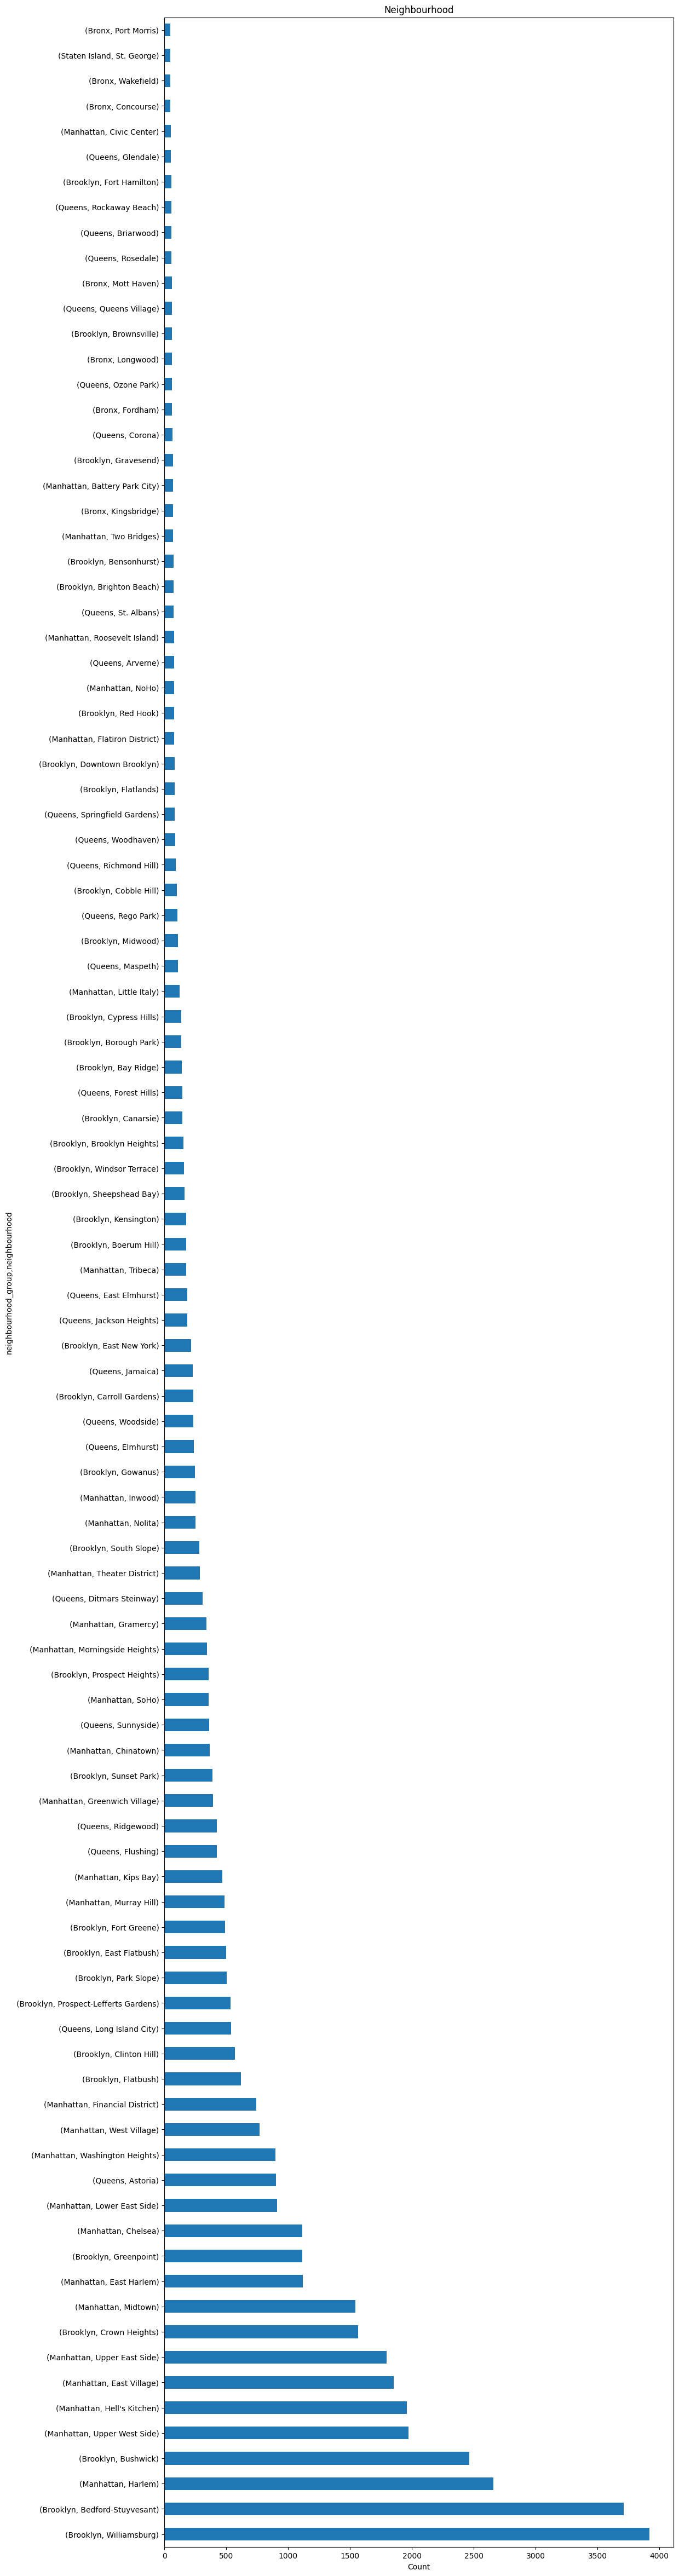

In [ ]:
df[['neighbourhood_group','neighbourhood']].value_counts()[:100].plot(kind='barh', figsize=(12, 60), title='Neighbourhood')
plt.xlabel('Count')

plt.subplots_adjust(wspace=0.5);

Not anything mind blowing here based on what the value counts were above, but this is a visual display of the top 100 neighborhoods by distribution.

#### 1.3.3.4 Distribution of Values to Target Variable

##### 1.3.3.4.1 Average Price to Category Feature

In [ ]:
target_means = df.groupby(['neighbourhood_group','room_type'])[['price']].mean()
target_means.head()

price
neighbourhood_group room_type                  
Bronx               Entire home/apt  127.506596
                    Private room      66.788344
                    Shared room       59.800000
Brooklyn            Entire home/apt  178.327545
                    Private room      76.500099

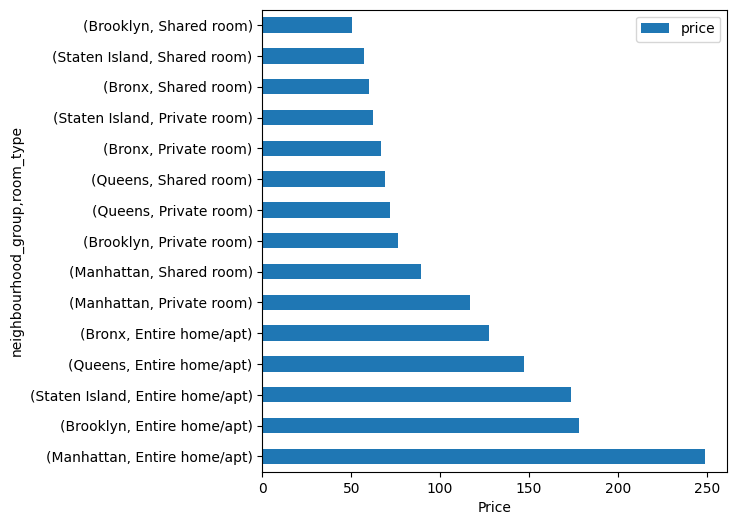

In [ ]:
target_means_sorted = target_means.reindex(index=target_means.mean(axis=1).sort_values(ascending=False).index)

target_means_sorted.plot(kind='barh', figsize=(6, 6))
plt.xlabel('Price');

I cannot believe Staten Island has a greater average price for airbnb over Queens. I wonder if there is some outliers in those groups. Obviously, an entire home would be more expensive, but what I wanted to see was that even a shared room in Manhattan is on average more pricy than a private room in another burough. I'm curious what the neighbourhoods

##### 1.3.3.4.2 Distribution of Price by Category Feature

### 1.3.4 Numeric Features

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### 1.3.4.1 Distribution of Feature Values

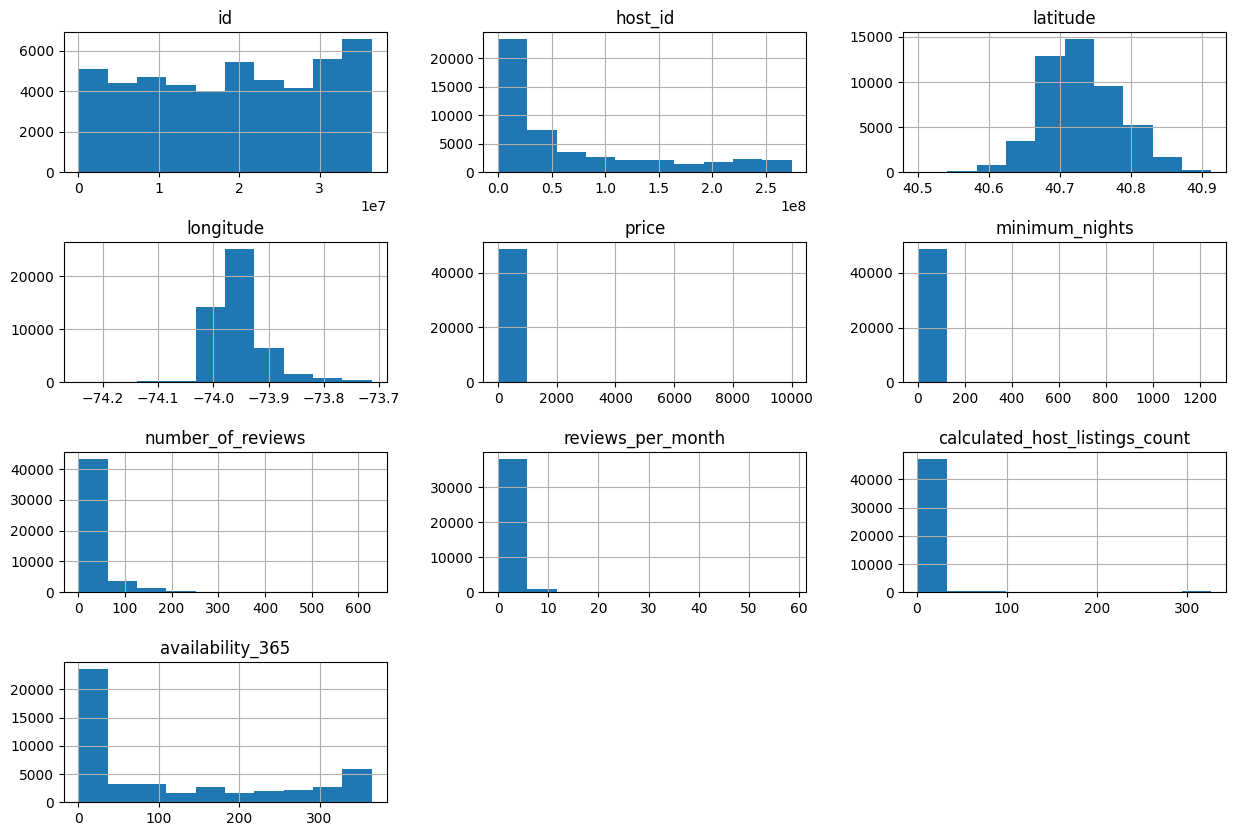

In [ ]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

## 1.4 Drop Rows Missing Target Feature

In [ ]:
missing_price = df[['price']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

,count
0,100.0


I already confirmed this, but it looks like every row has a price of some kind. In other words none of the rows have a Null value.

In [ ]:
df[['W']].isnull().sum()

In [ ]:
df = df[missing_price != ]

## 1.6 Exogeneous Data & Feature Engineering

This part is a little more difficult because in past projects feature engineering has really imporved model performance whereas other instances it overfit the model or introduced multicollienarity. Let's see what comes up however and see what the effects might be.

### Feature Engineering

In [ ]:
df['minimum_nights_x_availability_365'] = df['minimum_nights'] * df['availability_365']
df['reviews_x_reviews_per_month'] = df['number_of_reviews'] * df['reviews_per_month']
df['minimum_nights_sq'] = df['minimum_nights']**2

**Capturing Non-Linear Relationships:** A simple linear model assumes a straight-line relationship between the feature and the target variable (price). However, the relationship between the minimum number of nights and the price might not be linear. Squaring the term allows the model to capture a curved or parabolic relationship. For example, the impact of requiring 2 minimum nights might be different than the impact of requiring 10 minimum nights, and squaring can help model this non-linear effect.

**Increased Flexibility:** Including polynomial terms gives the model more flexibility to fit the data. It can account for situations where the effect of a feature increases or decreases at a non-constant rate as the feature's value changes.

In [ ]:
df['neighbourhood_group_encoded'] = pd.factorize(df['neighbourhood_group'])[0]
df['room_type_encoded'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_encoded'] = pd.factorize(df['neighbourhood'])[0]

In [ ]:
df[df['host_id'] == 163035332].T

,39471,39961,40412
id,30754138,31052910,31325866
name,Prime Soho apartment with private backyard,GORGEOUS PRIME SOHO 3 BEDROOMS PENTHOUSE,Amazing Soho Apartments with Private Backyard
host_id,163035332,163035332,163035332
host_name,Pirin,Pirin,Pirin
neighbourhood_group,Manhattan,Manhattan,Manhattan
neighbourhood,SoHo,SoHo,SoHo
latitude,40.72199,40.72267,40.72273
longitude,-74.00444,-74.00334,-74.00479
room_type,Entire home/apt,Entire home/apt,Entire home/apt
price,550,649,1299


In [ ]:
url = ''
df2 = pd.read_html(url)

In [ ]:
type(df2)

In [ ]:
len(df2)

In [ ]:
df2 = df2[0]
df2.head()

## 1.5 Review Distributions

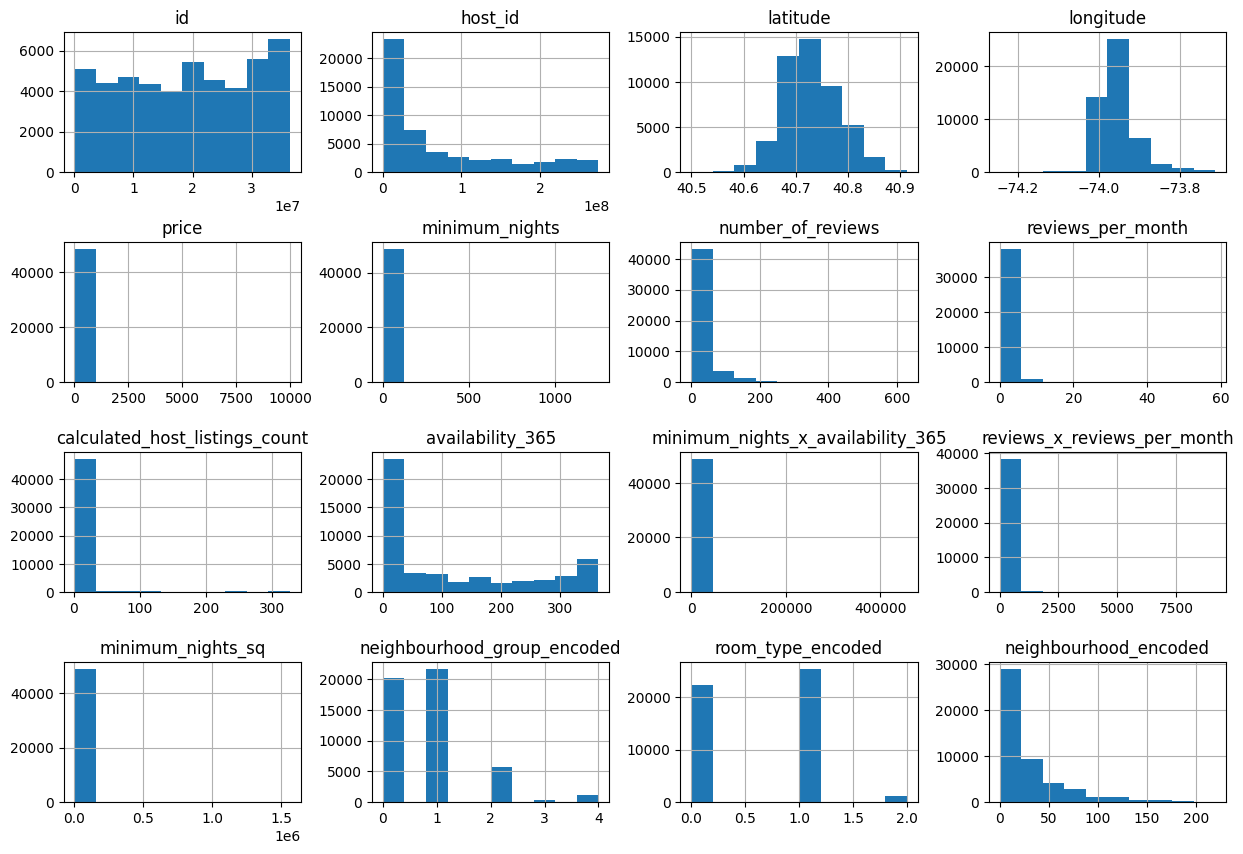

In [ ]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

For several features it appears the distribution is skewed greatly one way or the other. Meaning that there are outliers with huge distances from the norm. I'm not sure whether normalizing the distribution would help or not however. Price for instance rarely goes over 2500, but there's a price of 10,000. I think in general it will be fine since my pipelines will include a scalar.

In [ ]:
df[df['price'] >= 2500]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_nights_x_availability_365,reviews_x_reviews_per_month,minimum_nights_sq,neighbourhood_group_encoded,room_type_encoded,neighbourhood_encoded
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,...,NaN,NaN,1,365,2555,NaN,49,1,0,8
1862,826690,"Sunny, Family-Friendly 2 Bedroom",4289240,Lucy,Brooklyn,Prospect Heights,40.67919,-73.97191,Entire home/apt,4000,...,NaN,NaN,1,83,332,NaN,16,0,1,29
2018,893413,Architecturally Stunning Former Synagogue!,4751930,Martin,Manhattan,East Village,40.72668,-73.98179,Entire home/apt,2500,...,2019-07-01,0.26,1,89,2670,3.90,900,1,1,19
2698,1448703,Beautiful 1 Bedroom in Nolita/Soho,213266,Jessica,Manhattan,Nolita,40.72193,-73.99379,Entire home/apt,5000,...,2013-09-28,0.03,1,365,365,0.06,1,1,1,64
3537,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,...,2015-02-17,0.27,1,359,5026,4.59,196,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45867,34981637,bay ridge & sunset park furnished apartment,263564234,Nony,Brooklyn,Bay Ridge,40.63087,-74.02006,Entire home/apt,4200,...,NaN,NaN,1,90,5400,NaN,3600,0,1,90
46533,35297214,Amazing Chelsea 4BR Loft!,256649546,Viberlyn,Manhattan,Chelsea,40.73999,-73.99806,Entire home/apt,2995,...,2019-06-24,1.00,1,214,6420,1.00,900,1,1,14
46614,35345358,Northside Williamsburg Stunner,956324,Alex,Brooklyn,Williamsburg,40.71705,-73.96470,Entire home/apt,4500,...,NaN,NaN,1,365,10950,NaN,900,0,1,12
48043,36056808,Luxury TriBeCa Apartment at an amazing price,271248669,Jenny,Manhattan,Tribeca,40.71206,-74.00999,Entire home/apt,6500,...,NaN,NaN,1,365,65700,NaN,32400,1,1,77


## 1.7 Target Feature

In [ ]:
df.plot(x='Target1', y='Target2', kind='scatter');

In [ ]:
df.loc[df[''] == '', ['Target1', 'Target2']]

In [ ]:
df[['', '']].isnull().sum()

In [ ]:
df[''].fillna(0, inplace=True)
df[''].fillna('N/A', inplace=True)

In [ ]:
df.drop(columns=[''], inplace=True)
#df.dropna(subset=[''], inplace=True)

In [ ]:
df.shape

In [ ]:
df.info()

### 1.7.1 Number of Missing Values by Row

In [ ]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

In [ ]:
missing['%'].unique()

In [ ]:
missing['%'].value_counts()

## 1.8 Save Data

In [ ]:
import os
import pickle

def save_file(data, filename, datapath):
    """Saves data to a file in the specified directory, supporting CSV and pickle formats."""
    if not os.path.exists(datapath):
        os.makedirs(datapath)
    file_path = os.path.join(datapath, filename)

    if filename.endswith('.csv'):
        data.to_csv(file_path, index=False)
        print(f"DataFrame saved to {file_path}")
    elif filename.endswith('.pkl'):
        with open(file_path, 'wb') as f:
            pickle.dump(data, f)
        print(f"Model saved to {file_path}")
    else:
        print(f"Unsupported file format for {filename}")

In [ ]:
datapath = '/content/drive/MyDrive/Data'

save_file(df, 'airbnb_cleaned.csv', datapath)

DataFrame saved to /content/drive/MyDrive/Data/airbnb_cleaned.csv


In [ ]:
datapath = '../data'
save_file(df2, 'df2.csv', datapath)

# 2.0 Exploratory Data Analysis

## Univariate Analysis

In [ ]:
def plot_compare(feat_name, description, id, conf=None, figsize=(10, 5)):
    """Graphically compare distributions of features.

    Plot histogram of values for all resorts and reference line to mark
    Boise State's position.

    Arguments:
    feat_name - the feature column name in the data
    description - text description of the feature
    conf - select a specific conference (None for all conferences)
    figsize - (optional) figure size
    """
    boise_st = df[df['host_id'] == id]

    plt.subplots(figsize=figsize)
    # quirk that hist sometimes objects to NaNs, sometimes doesn't
    # filtering only for finite values tidies this up
    if conf is None:
        ski_x = df[feat_name]
    else:
        ski_x = df.loc[df['neighbourhood_group'] == conf, feat_name]
    ski_x = ski_x[np.isfinite(ski_x)]
    plt.hist(ski_x, bins=30)
    # Calculate the mean value for Boise State to plot a single vertical line
    boise_st_mean_feat = boise_st[feat_name].mean()
    plt.axvline(x=boise_st_mean_feat, c='r', ls='--', alpha=0.8, label=f'host {id}')
    plt.xlabel(description)
    plt.ylabel('frequency')
    plt.title(description + ' distribution for Neighborhood')
    plt.legend()

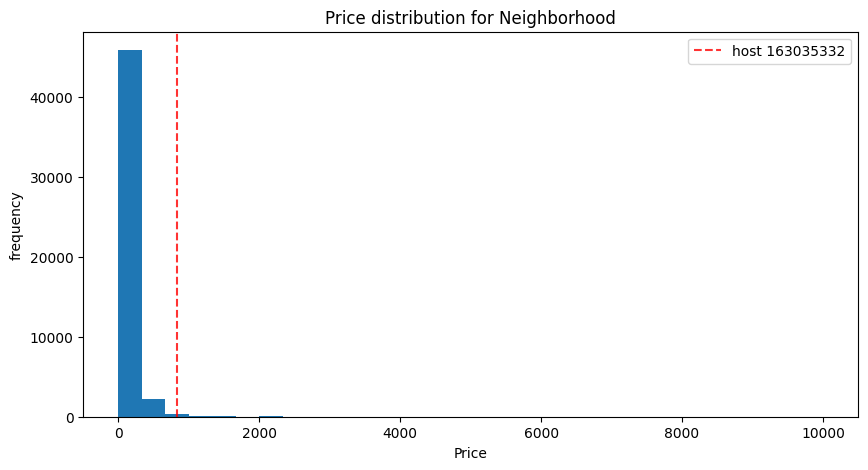

In [ ]:
plot_compare('price', conf=None, description='Price', id=163035332)

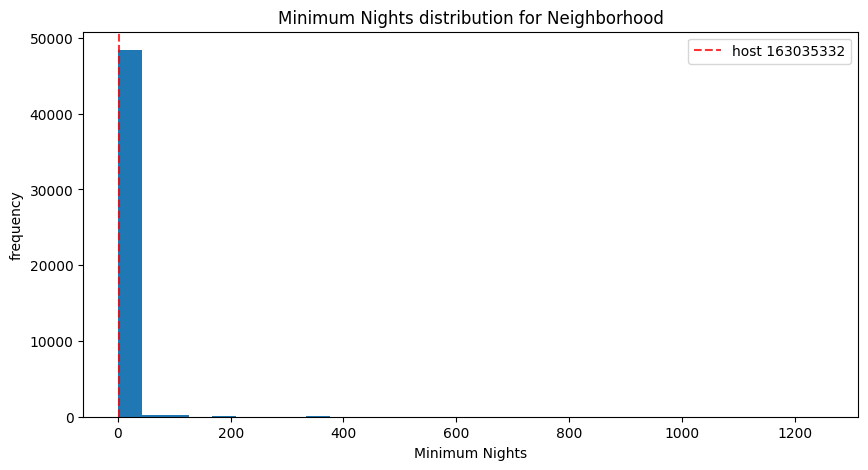

In [ ]:
plot_compare('minimum_nights', conf=None, description='Minimum Nights', id=163035332)

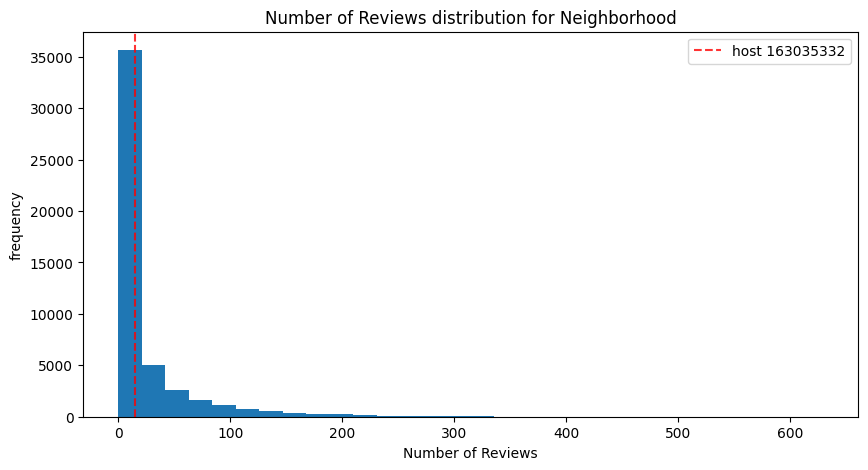

In [ ]:
plot_compare('number_of_reviews', conf=None, description='Number of Reviews', id=163035332)

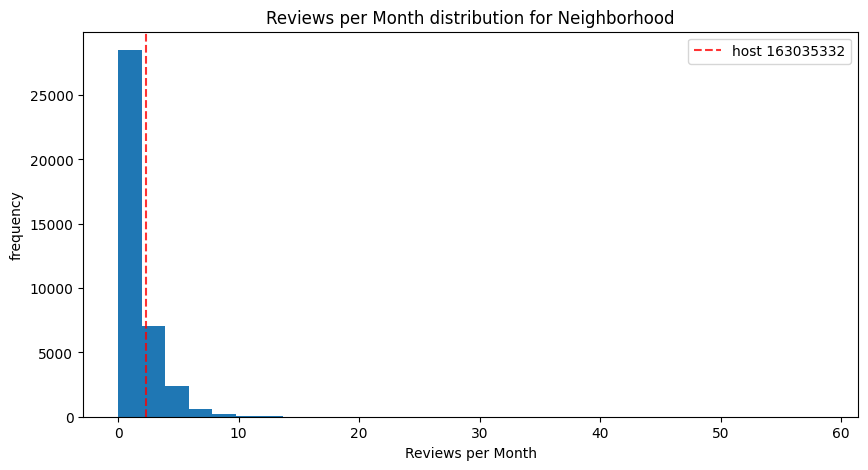

In [ ]:
plot_compare('reviews_per_month', conf=None, description='Reviews per Month', id=163035332)

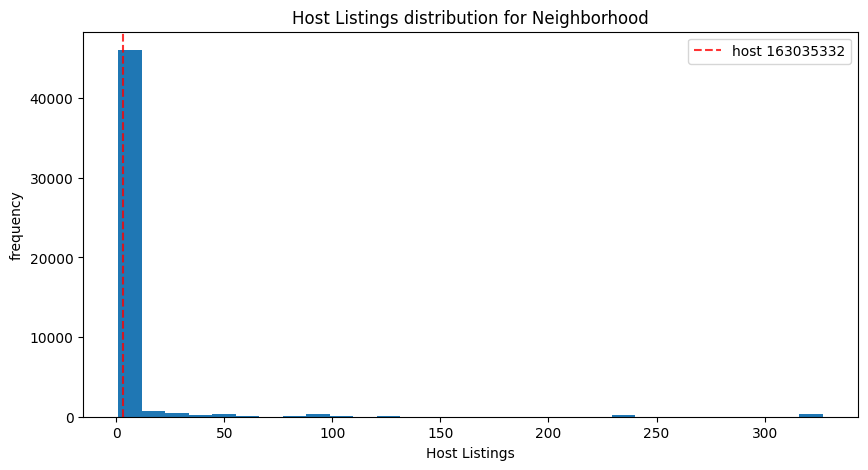

In [ ]:
plot_compare('calculated_host_listings_count', conf=None, description='Host Listings', id=163035332)

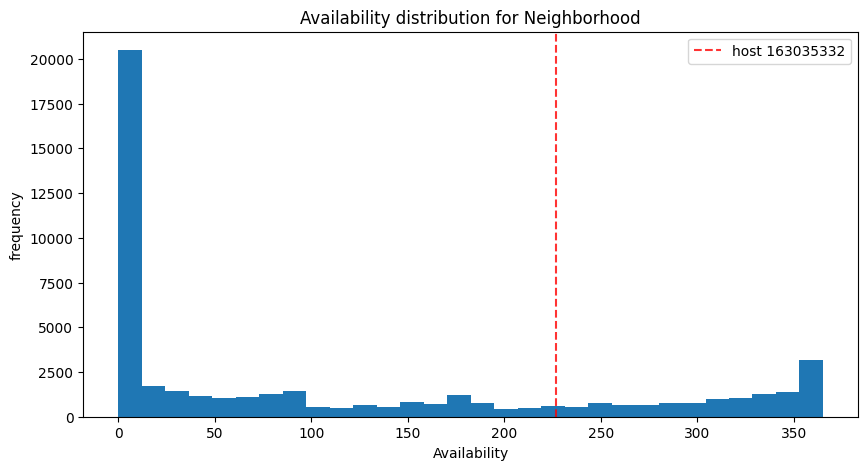

In [ ]:
plot_compare('availability_365', conf=None, description='Availability', id=163035332)

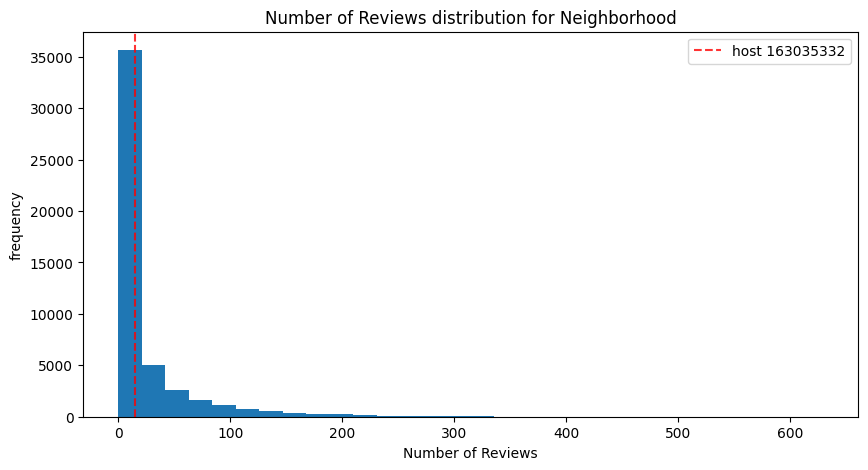

In [ ]:
plot_compare('number_of_reviews', conf=None, description='Number of Reviews', id=163035332)

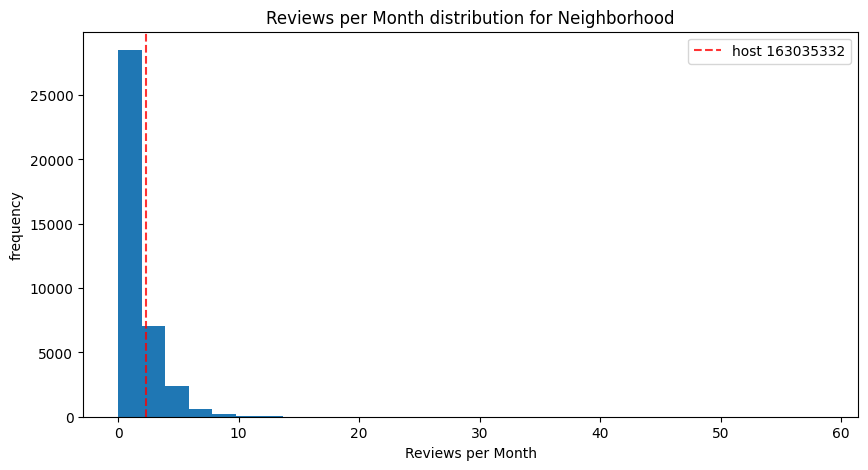

In [ ]:
plot_compare('reviews_per_month', conf=None, description='Reviews per Month', id=163035332)

## Bi-variate Analysis

In [ ]:
def plot_scatter_by_filters(df, x_col, y_col, conf=None, year=None, xlabel=None, ylabel=None, title=None):
    """
    Generates a scatter plot of two numeric columns, with optional filtering by conference and year.

    Args:
        df (pd.DataFrame): The input DataFrame.
        x_col (str): The name of the column for the x-axis.
        y_col (str): The name of the column for the y-axis.
        conf (str, optional): The conference to filter by. Defaults to None (plot all conferences).
        year (int, optional): The year to filter by. Defaults to None (plot all years).
        xlabel (str, optional): The label for the x-axis. Defaults to the x_col name.
        ylabel (str, optional): The label for the y-axis. Defaults to the y_col name.
        title (str, optional): The title of the plot. Defaults to a generated title.
    """
    df_filtered = df.copy()

    if conf:
        df_filtered = df_filtered[df_filtered['CONF'] == conf]
        if df_filtered.empty:
            print(f"No data found for conference: {conf}")
            return

    if year:
        df_filtered = df_filtered[df_filtered['YEAR'] == year]
        if df_filtered.empty:
            print(f"No data found for year: {year}")
            return

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_filtered, x=x_col, y=y_col)

    if xlabel is None:
        xlabel = x_col
    if ylabel is None:
        ylabel = y_col
    if title is None:
        title = f'{y_col} vs {x_col}'
        if conf and year:
            title += f' for {conf} Conference in {year}'
        elif conf:
            title += f' for {conf} Conference'
        elif year:
            title += f' in {year}'

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()

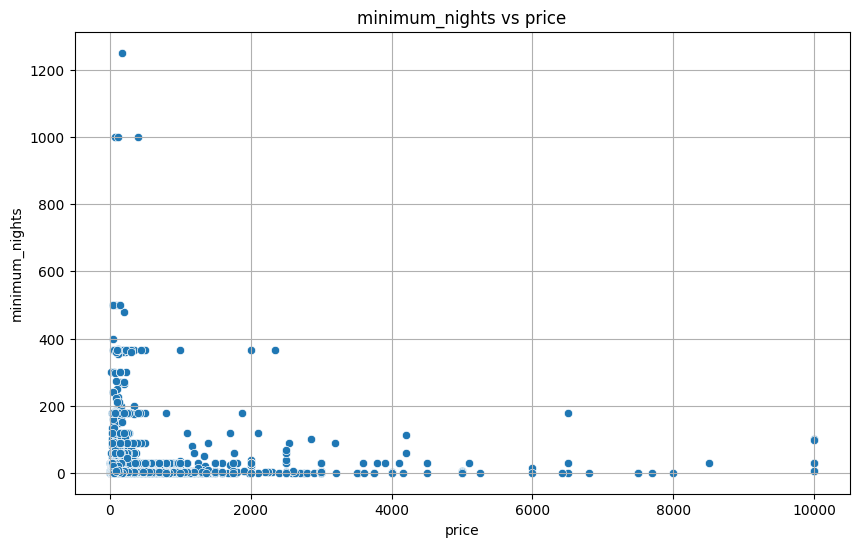

In [ ]:
plot_scatter_by_filters(df, 'price', 'minimum_nights', conf=None, year=None, xlabel=None, ylabel=None, title=None)

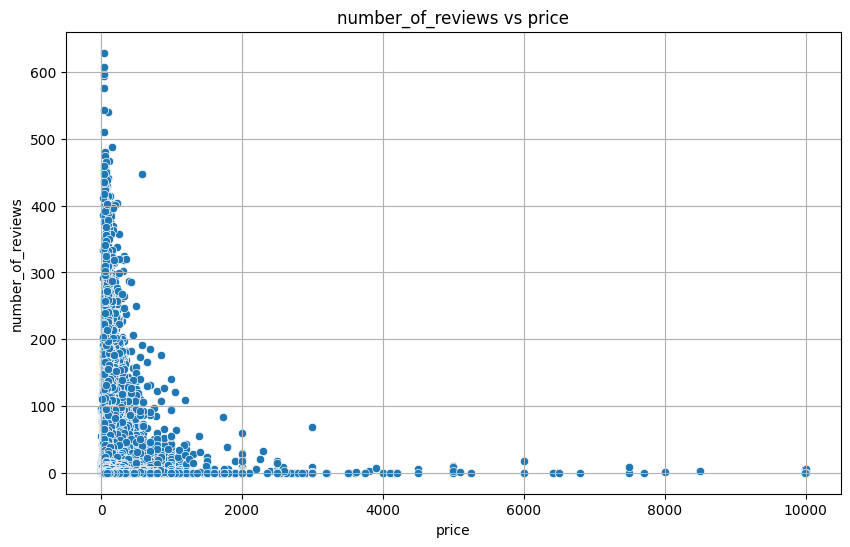

In [ ]:
plot_scatter_by_filters(df, 'price', 'number_of_reviews', conf=None, year=None, xlabel=None, ylabel=None, title=None)

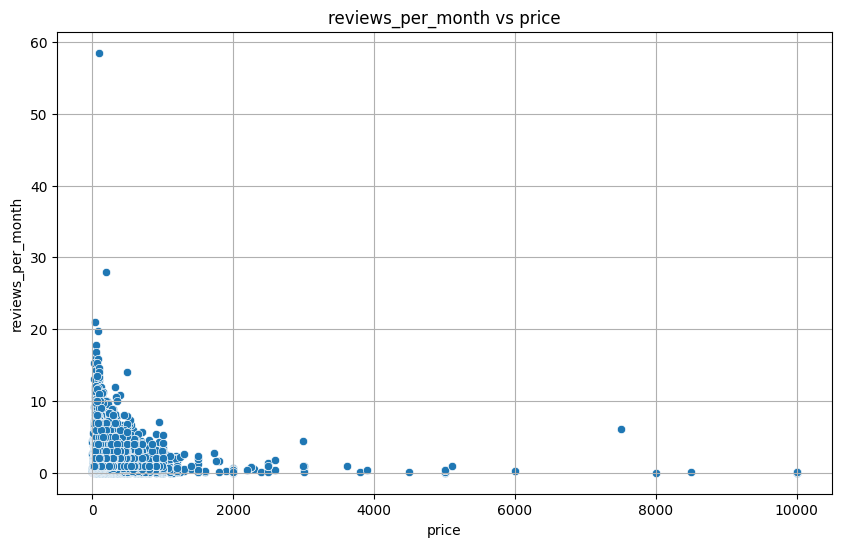

In [ ]:
plot_scatter_by_filters(df, 'price', 'reviews_per_month', conf=None, year=None, xlabel=None, ylabel=None, title=None)

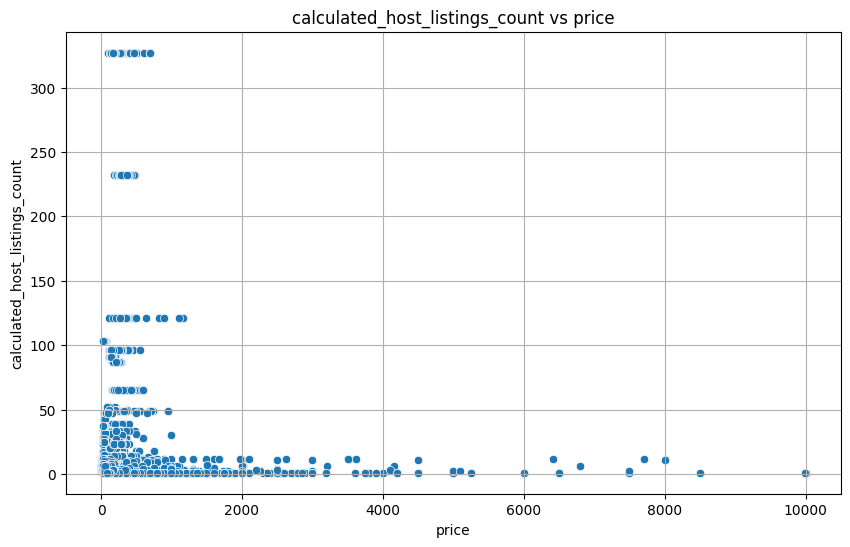

In [ ]:
plot_scatter_by_filters(df, 'price', 'calculated_host_listings_count', conf=None, year=None, xlabel=None, ylabel=None, title=None)

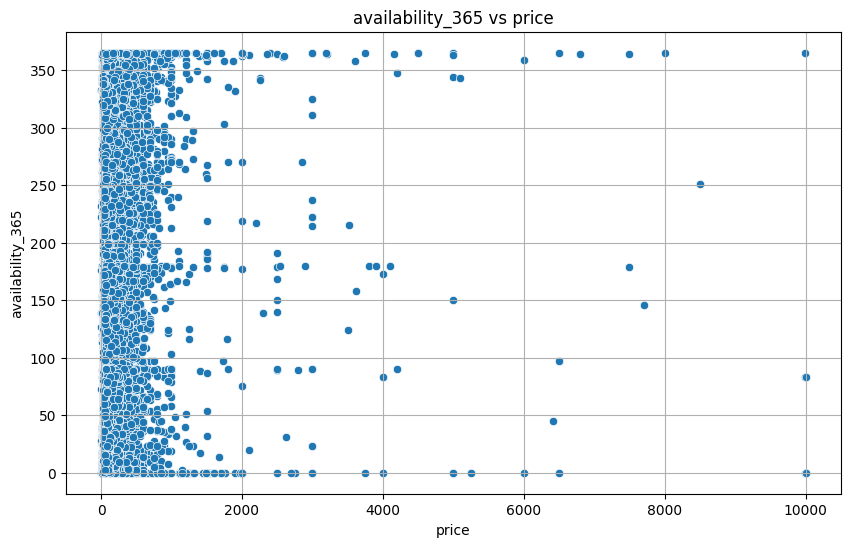

In [ ]:
plot_scatter_by_filters(df, 'price', 'availability_365', conf=None, year=None, xlabel=None, ylabel=None, title=None)

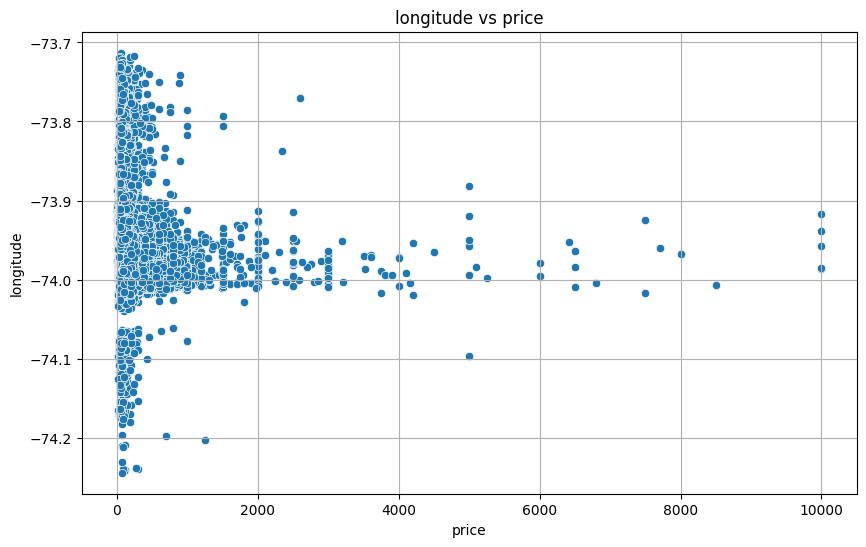

In [ ]:
plot_scatter_by_filters(df, 'price', 'longitude', conf=None, year=None)

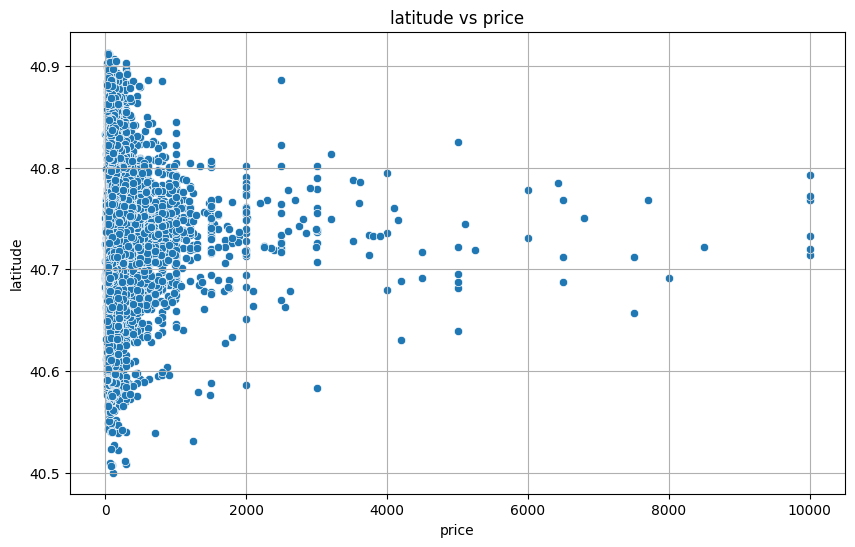

In [ ]:
plot_scatter_by_filters(df, 'price', 'latitude')

In [ ]:
plot_scatter_by_filters(df, 'price', 'longitude')

In [ ]:
plot_scatter_by_filters(df, 'price', 'latitude')

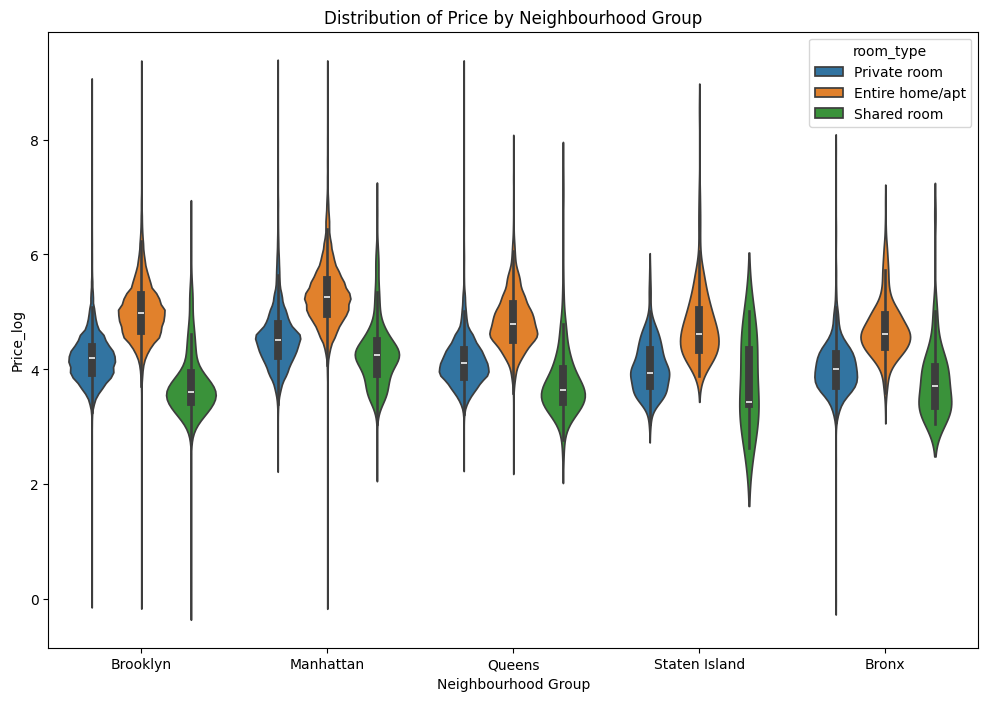

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_copy = df.copy()

df_copy['price_log'] = np.log1p(df['price'])

plt.figure(figsize=(12, 8))
sns.violinplot(x='neighbourhood_group', y='price_log',hue='room_type', data=df_copy)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price_log')
plt.title('Distribution of Price by Neighbourhood Group')
plt.show()

The data exploration is not yielding very interesting results in my opinion. There doesn't seem to be a very strong linear relationship to price and the other floating numeric features. Even something one would expect higher prices like number of reveiws etc. However on second thought those reveiws could be good or bad. We don't really know with this dataset.

The outliers on price also greatly skew the normalization of the prices. Meaning the histograms don't provide much information other than that there exists huge outliers in each feature.

The violin plot seems to be the only real insightful graph where we can see large clusters around a market determined price in each borough and room type while still capture how long the tails exist away from the highest concentration of price points.

### Timeseries Analysis

In [ ]:
def plot_team_performance_over_years(df, y_col, conf=None, ylabel=None, highlight_team=None):
    """
    Generates a line plot showing a numeric performance metric over the years for each team,
    optionally filtered by conference, and highlights a specific team.

    Args:
        df (pd.DataFrame): The input DataFrame with 'TEAM', 'YEAR', and the specified y_col.
        y_col (str): The name of the numeric column to plot on the y-axis.
        conf (str, optional): The conference to filter by. Defaults to None (plot all teams).
        ylabel (str, optional): The label for the y-axis. Defaults to the y_col name.
        highlight_team (str, optional): The name of the team to highlight. Defaults to None.
    """
    plt.figure(figsize=(15, 8))

    if conf:
        df_filtered = df[df['CONF'] == conf].copy()
        if df_filtered.empty:
            print(f"No teams found for conference: {conf}")
            return
        teams = df_filtered['TEAM'].unique()
        plt.title(f'{y_col} Over Years for Teams in {conf} Conference')
    else:
        df_filtered = df.copy()
        teams = df_filtered['TEAM'].unique()
        plt.title(f'{y_col} Over Years for Each Team')

    if ylabel is None:
        ylabel = y_col

    for team in teams:
        team_data = df_filtered[df_filtered['TEAM'] == team].sort_values(by='YEAR')
        if team == highlight_team:
            plt.plot(team_data['YEAR'], team_data[y_col], marker='o', linestyle='-', label=team, color='red', linewidth=2)
        else:
            plt.plot(team_data['YEAR'], team_data[y_col], marker='o', linestyle='-', label=team if len(teams) < 20 else "_nolegend_", alpha=0.5) # Add label for legend if not too many teams


    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.grid(True)

    # Add legend only if there are not too many teams or a team is highlighted
    if len(teams) < 20 or highlight_team:
        plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

## Multi-Variate Analysis

In [ ]:
columns = df.select_dtypes(['int64','float64']).columns.to_list()
team_avg_win = df.groupby('neighbourhood_group')[columns].mean()
team_avg_win.head()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,minimum_nights_x_availability_365,reviews_x_reviews_per_month,minimum_nights_sq,neighbourhood_group_encoded,room_type_encoded,neighbourhood_encoded
neighbourhood_group,,,,,,,,,,,,,,,,
Bronx,2.273492e+07,1.056099e+08,40.848305,-73.884552,87.496792,4.560953,26.004583,1.837831,2.233731,165.758937,901.769019,94.356507,264.931256,4.0,0.457379,119.192484
Brooklyn,1.825685e+07,5.671526e+07,40.685036,-73.951190,124.383207,6.056556,24.202845,1.283212,2.284371,100.232292,846.780442,79.115161,347.579437,0.0,0.516564,24.069240
Manhattan,1.877494e+07,6.783062e+07,40.765062,-73.974607,196.875814,8.579151,20.985596,1.272131,12.791330,111.979410,1606.476294,74.209381,652.018882,1.0,0.653663,19.080698
Queens,2.175500e+07,9.615680e+07,40.731531,-73.872775,99.517649,5.181433,27.700318,1.941200,4.060184,144.451818,811.323685,140.248929,252.669961,2.0,0.439816,68.793682
Staten Island,2.159747e+07,9.853360e+07,40.610225,-74.105805,114.812332,4.831099,30.941019,1.872580,2.319035,199.678284,1103.144772,103.720032,411.474531,3.0,0.520107,119.016086


In [ ]:
team_avg_win_index = team_avg_win.index

team_avg_win_columns = team_avg_win.columns
team_avg_win_scale = team_avg_win.copy()

team_avg_win_scale = scale(team_avg_win_scale)

team_avg_win_scale = pd.DataFrame(team_avg_win_scale, columns=team_avg_win_columns, index=team_avg_win_index)
team_avg_win_scale.std(ddof=0)

,0
id,1.0
host_id,1.0
latitude,1.0
longitude,1.0
price,1.0
minimum_nights,1.0
number_of_reviews,1.0
reviews_per_month,1.0
calculated_host_listings_count,1.0
availability_365,1.0


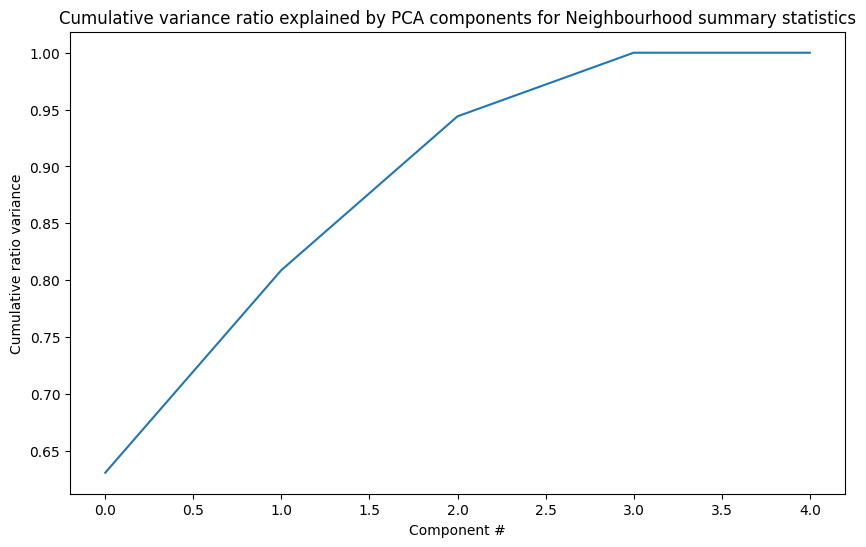

In [ ]:
team_pca = PCA().fit(team_avg_win_scale)

plt.subplots(figsize=(10, 6))
plt.plot(team_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Borough summary statistics');

In [ ]:
team_pca_x = team_pca.transform(team_avg_win_scale)
team_pca_x.shape

(5, 5)

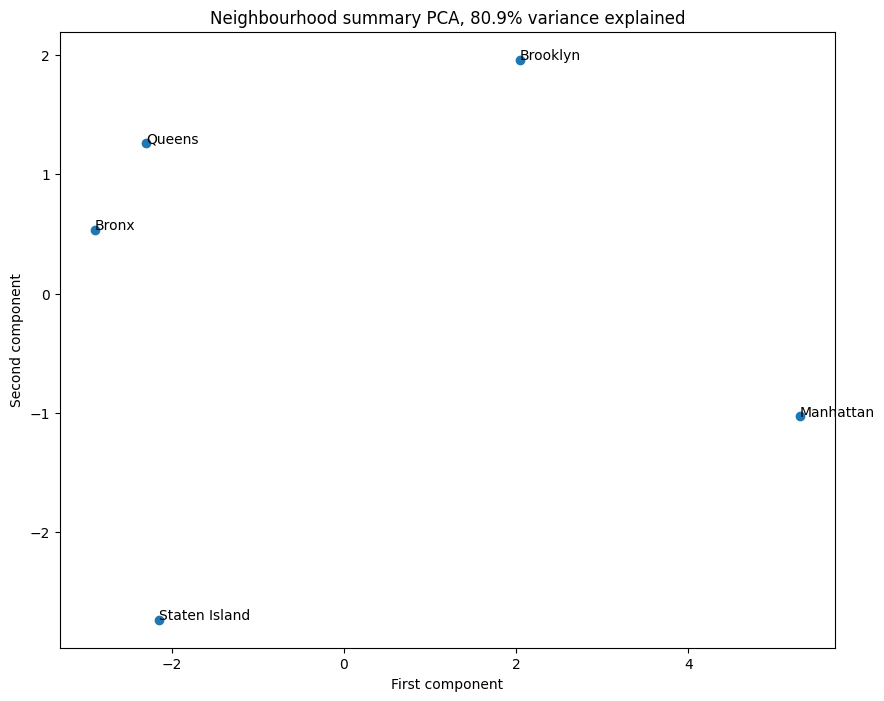

In [ ]:
x = team_pca_x[:, 0]
y = team_pca_x[:, 1]
state = team_avg_win_index
pc_var = 100 * team_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Borough Summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))


Very interesting that Brooklyn and Manhattan are so far apart. Sadly, Staten Island is negatively impacted by both components. I'm curious what the PCA might be if we grouped by a more granular or room type.

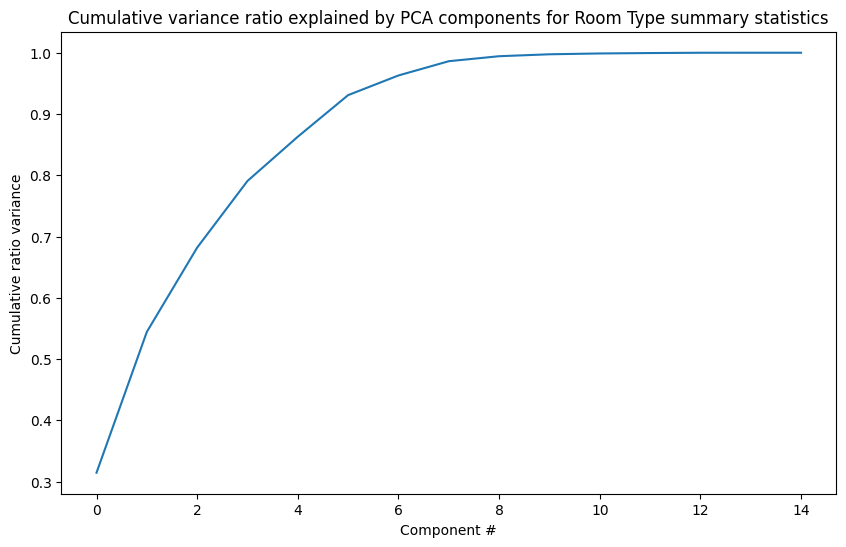

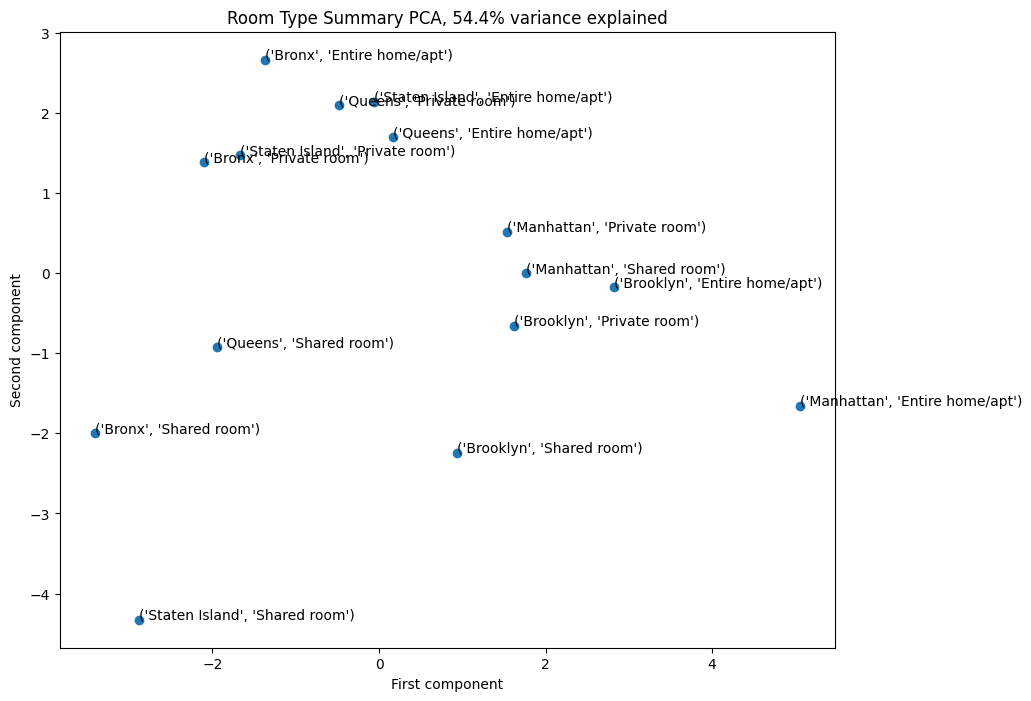

In [ ]:
columns = df.select_dtypes(['int64','float64']).columns.to_list()
team_avg_win = df.groupby(['neighbourhood_group','room_type'])[columns].mean().fillna(0)
team_avg_win.head()

team_avg_win_index = team_avg_win.index

team_avg_win_columns = team_avg_win.columns
team_avg_win_scale = team_avg_win.copy()

team_avg_win_scale = scale(team_avg_win_scale)

team_avg_win_scale = pd.DataFrame(team_avg_win_scale, columns=team_avg_win_columns, index=team_avg_win_index)
team_avg_win_scale.std(ddof=0)

team_pca = PCA().fit(team_avg_win_scale)

plt.subplots(figsize=(10, 6))
plt.plot(team_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for Room Type summary statistics');

team_pca_x = team_pca.transform(team_avg_win_scale)
team_pca_x.shape

x = team_pca_x[:, 0]
y = team_pca_x[:, 1]
state = team_avg_win_index
pc_var = 100 * team_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Room Type Summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

Adding in room type makes the PCA analysis a little more interesting. As there is more variety among the data if room_type is considered in the average analysis. I tried looking at neighbourhoods as well too, but unfortuantely because there are so many neighbourhoods the visual doesn't provide much insight on the data.

### Feature Correlation

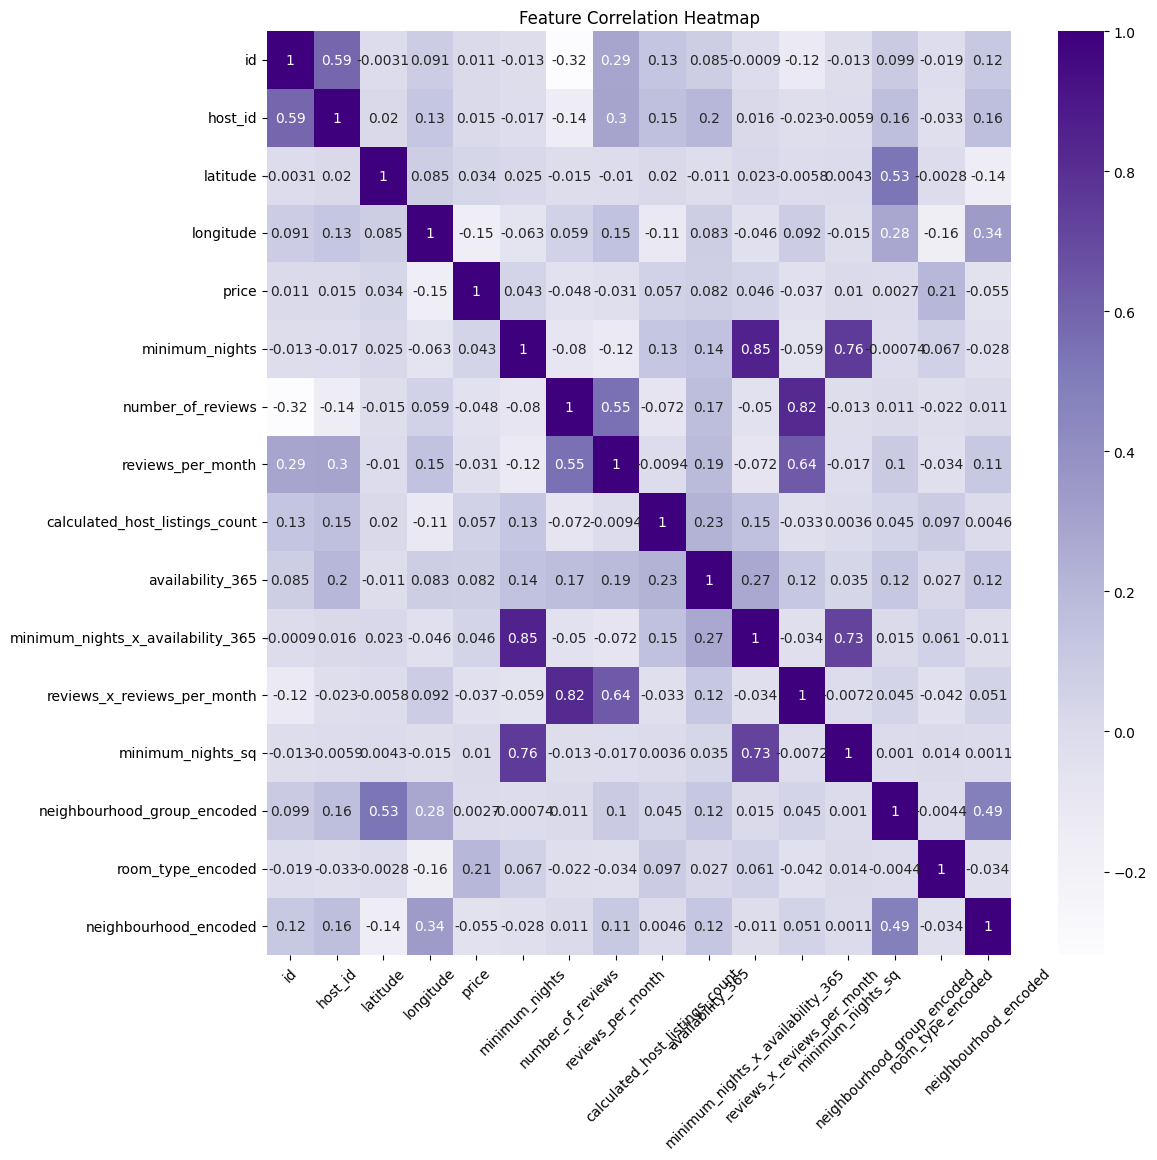

In [ ]:
corr = df.select_dtypes(['int64','float64']).corr()

plt.figure(figsize=(12,12), facecolor='w')
sns.heatmap(corr, annot=True, cmap='Purples')
plt.title('Feature Correlation Heatmap')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()

# 3.0 Preprocessing & Training

## 3.1 Imports

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.dummy import DummyRegressor # Import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import datetime
import pickle
from sklearn import __version__ as sklearn_version

In [ ]:
os.getcwd()

'/home/eminshall/Predictive Analytics/Price Optimization/Airbnb'

In [ ]:
df = pd.read_csv('airbnb_cleaned.csv')

## 3.2 Train Test Split

In [ ]:
boise_st = df[df.host_id == 163035332]
boise_st.T

,39471,39961,40412
id,30754138,31052910,31325866
name,Prime Soho apartment with private backyard,GORGEOUS PRIME SOHO 3 BEDROOMS PENTHOUSE,Amazing Soho Apartments with Private Backyard
host_id,163035332,163035332,163035332
host_name,Pirin,Pirin,Pirin
neighbourhood_group,Manhattan,Manhattan,Manhattan
neighbourhood,SoHo,SoHo,SoHo
latitude,40.72199,40.72267,40.72273
longitude,-74.00444,-74.00334,-74.00479
room_type,Entire home/apt,Entire home/apt,Entire home/apt
price,550,649,1299


In [ ]:
df = df[df.host_id != 163035332]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='price'),
                                                    df.price, test_size=0.3,
                                                    random_state=47)

In [ ]:
X_train.shape, X_test.shape

((34224, 21), (14668, 21))

In [ ]:
names_list = df.select_dtypes('object').columns.to_list()
names_train = X_train[names_list]
names_test = X_test[names_list]
X_train.drop(columns=names_list, inplace=True)
X_test.drop(columns=names_list, inplace=True)
X_train.shape, X_test.shape

((34224, 15), (14668, 15))

In [ ]:
y_train.shape, y_test.shape

((34224,), (14668,))

## 3.3 Not-Even-A-Model
The goal of not-even-a-model is to establish a baseline. Meaning our model is only useful if it can perform better than simply calculating the average.

In [ ]:
train_mean = y_train.mean()
train_mean

np.float64(152.16146563814866)

In [ ]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[152.16146564]])

In [ ]:
y_pred_dumb = dumb_reg.predict(X_train)
y_pred_dumb[:5]

array([152.16146564, 152.16146564, 152.16146564, 152.16146564,
       152.16146564])

In [ ]:
y_tr_pred_ = train_mean * np.ones(len(y_train))

In [ ]:
y_te_pred = train_mean * np.ones(len(y_test))

## 3.4 Metrics

### 3.4.1 R-squared

In [ ]:
r2_score(y_train, y_pred_dumb), r2_score(y_test, y_te_pred)

(0.0, -4.160041497902611e-05)

### 3.4.2 Mean Absolute Error

In [ ]:
mean_absolute_error(y_train, y_pred_dumb), mean_absolute_error(y_test, y_te_pred)

(91.58858044468354, 93.61350389796262)

### 3.4.3 Mean Squared Error

In [ ]:
mean_squared_error(y_train, y_pred_dumb), mean_squared_error(y_test, y_te_pred)

(51689.9788376836, 71527.87584559905)

## 3.5 Initial Models

### Regression Models

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#Linear Regression
lr_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

# Lasso Regression
lasso_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    Lasso()
)

# Ridge Regression
ridge_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    Ridge()
)

# Fitting models on Training data
lr_pipe.fit(X_train, y_train)
lasso_pipe.fit(X_train, y_train)
ridge_pipe.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr_pipe.predict(X_test)
y_pred_lasso = lasso_pipe.predict(X_test)
y_pred_ridge = ridge_pipe.predict(X_test)

Text(0.5, 0.98, 'True vs Predicted')

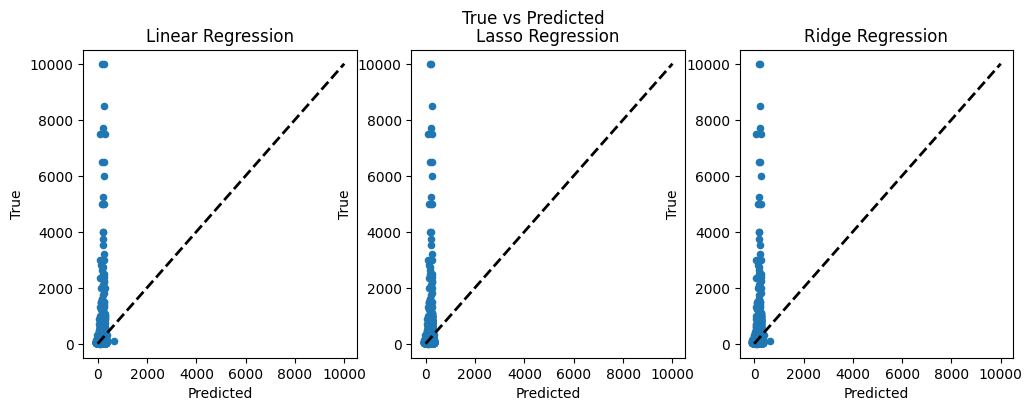

In [ ]:
#Plot the Regression Models

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4), facecolor='w')

#plot linear regression
ax1.scatter(y_pred_lr, y_test, s=20)
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax1.set_ylabel("True")
ax1.set_xlabel("Predicted")
ax1.set_title("Linear Regression")

#plot lasso regression
ax2.scatter(y_pred_lasso, y_test, s=20)
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax2.set_ylabel("True")
ax2.set_xlabel("Predicted")
ax2.set_title("Lasso Regression")

#plot ridge regression
ax3.scatter(y_pred_ridge, y_test, s=20)
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax3.set_ylabel("True")
ax3.set_xlabel("Predicted")
ax3.set_title("Ridge Regression")

fig.suptitle("True vs Predicted")

Unsurprisingly, the classic regression models perform pretty badly as the numeric values do not seem to provide much linear correspondence to the price during our exploratory evaluation of the data. We can also note that the high level of outliers in this data make classic linear models to perform less effectively.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_pipe = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SelectKBest(f_regression),
    DecisionTreeRegressor()
)

dtr_pipe.fit(X_train, y_train)

y_pred_dtr = dtr_pipe.predict(X_test)

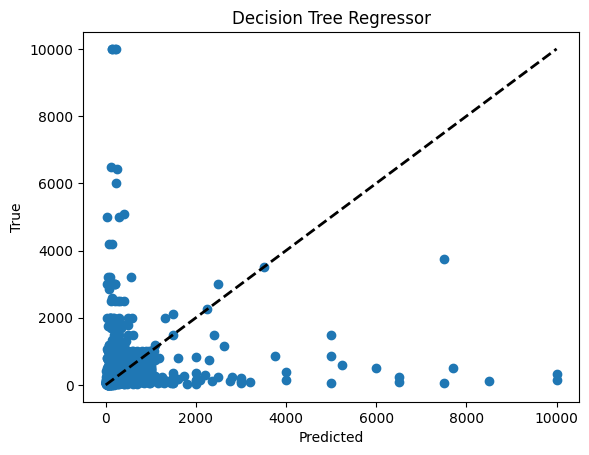

In [ ]:
#plot Decision Tree Regressor
plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor")
plt.show()

Visually, we can see the model struggles to predict airbnb listings with outlier pricing.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr_pipe = make_pipeline(
    SimpleImputer(),
    StandardScaler(),
    SelectKBest(f_regression),
    RandomForestRegressor()
)

rfr_pipe.fit(X_train, y_train)

y_pred_rfr = rfr_pipe.predict(X_test)

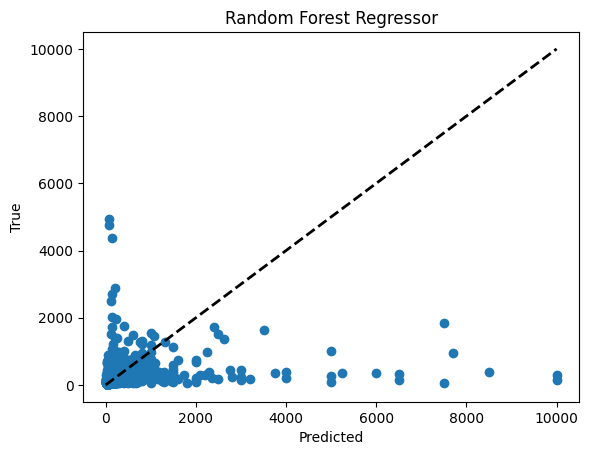

In [ ]:
#plot Random Forest Regressor
plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
            mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))
print("""LassoRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
            mean_absolute_error(y_test, y_pred_lasso), r2_score(y_test, y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t {:.2f} \t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_ridge)),mean_squared_error(y_test, y_pred_ridge),
            mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 259.62 		 67404.08 	78.63 		0.06
LassoRegression 	 259.51 		 67346.35 	78.08 		0.06
RidgeRegression 	 259.62 		 67404.05 	78.63 		0.06


In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_dtr)),mean_squared_error(y_test, y_pred_dtr),
            mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 343.71 		 118137.36 		90.54 		-0.65


In [ ]:
print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 259.56 		 67371.76 		69.29 		0.06


I'm really disappointed with these numbers to begin with because it shows the models really struggle to accurately predict the pricing for these. We've seen the correlation matrix to show the features don't correlate well to price and we can see too the outliers would pose a problem as well. I thought the tree regressors however would be able to compensate.

#### Hyperparamter Tuning

In [ ]:
k = [k+1 for k in range(len(X_train.columns))]
n_est = [int(n) for n in np.logspace(start=1, stop=2, num=7)]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None],
        'simpleimputer__strategy': ['mean', 'median'],
        'selectkbest__k': k
}

In [ ]:
rfr_grid_cv = GridSearchCV(rfr_pipe, param_grid=grid_params, verbose=1, cv=3, n_jobs=1)

In [ ]:
rfr_grid_cv.fit(X_train, y_train)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


,estimator,Pipeline(step...Regressor())])
,param_grid,"{'randomforestregressor__n_estimators': [10, 14, ...], 'selectkbest__k': [1, 2, ...], 'simpleimputer__strategy': ['mean', 'median'], 'standardscaler': [StandardScaler(), None]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,3
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,missing_values,nan


In [ ]:
rfr_grid_cv.best_params_

{'randomforestregressor__n_estimators': 46,
 'selectkbest__k': 14,
 'simpleimputer__strategy': 'median',
 'standardscaler': StandardScaler()}

In [ ]:
score_mean = rfr_grid_cv.cv_results_['mean_test_score']
score_std = rfr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in rfr_grid_cv.cv_results_['param_selectkbest__k']]

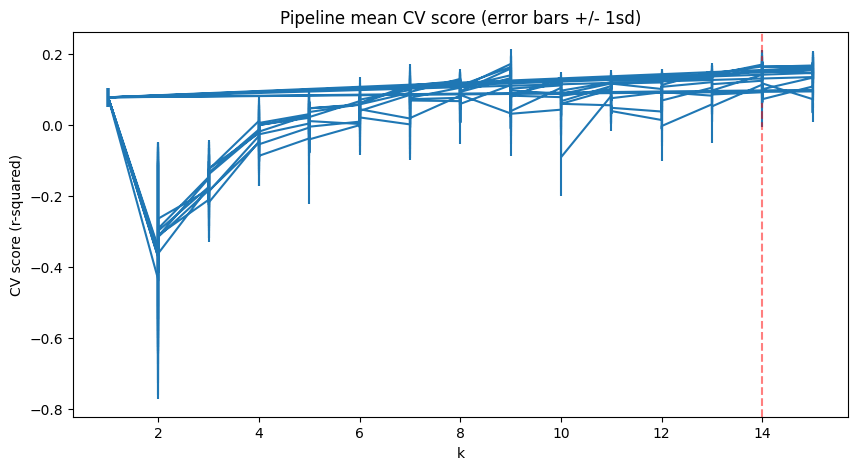

In [ ]:
best_k = rfr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [ ]:
rf_neg_mae = cross_validate(rfr_grid_cv.best_estimator_, X_train, y_train,
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [ ]:
rf_mae_mean = np.mean(-1 * rf_neg_mae['test_score'])
rf_mae_std = np.std(-1 * rf_neg_mae['test_score'])
rf_mae_mean, rf_mae_std

(np.float64(66.25687173291318), np.float64(1.9550681660940994))

In [ ]:
print("""Grid Cross Validation Regressor \t {:.2f}""".format(
            mean_absolute_error(y_test, rfr_grid_cv.best_estimator_.predict(X_test))))

Grid Cross Validation Regressor 	 68.19


There was a modest improvement in the MAE after hyperparamterization and cross-fold of the model. I think the outliers are posing a serious problem to the distortion of the model. In an earlier, investigation I found there were about 200 listings over $2,500 per night. Although, I wasn't sure whether or not I should remove this from the dataset.

#### Feature Importance

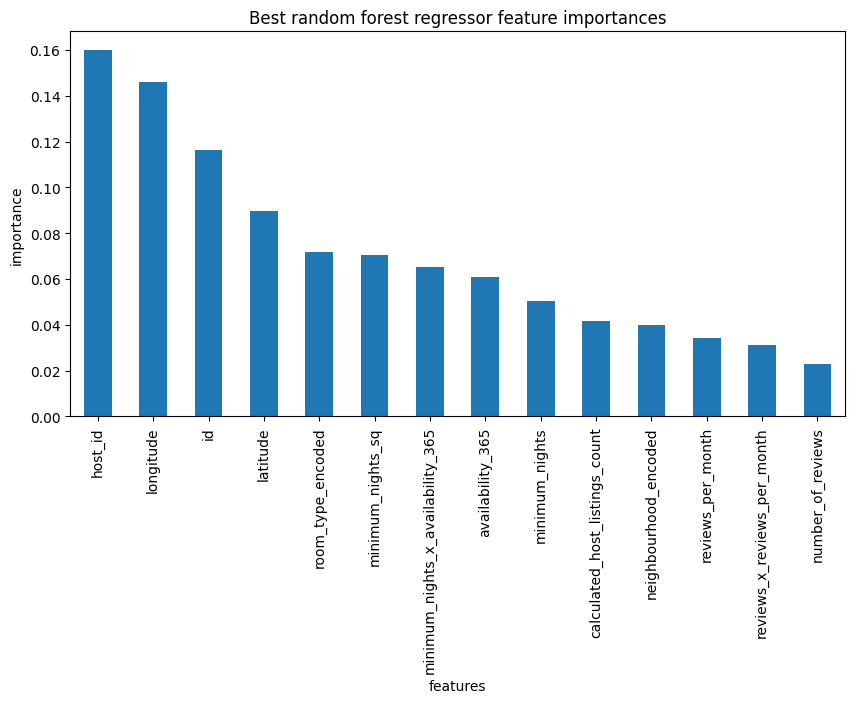

In [ ]:
plt.subplots(figsize=(10, 5))
imps = rfr_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_

# Get the names of the features selected by SelectKBest
selected_features_mask = rfr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()
selected_feature_names = X_train.columns[selected_features_mask]

rf_feat_imps = pd.Series(imps, index=selected_feature_names).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

### Classification Models

## Final Model Selection

In [ ]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(rfr_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
best_model = rfr_grid_cv.best_estimator_
best_model.version = 1.0
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

In [ ]:
modelpath = 'Models'
save_file(best_model, 'airbnb_model_1.pkl', modelpath)

Model saved to Models/airbnb_model_1.pkl


# 4.0 Modeling Checkpoint

In [ ]:
df = pd.read_csv('airbnb_cleaned.csv')

## Load Model

In [ ]:
expected_model_version = '1.0'
model_path = 'Models/airbnb_model_1.pkl' # Corrected path
if os.path.exists(model_path):
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    if model.version != expected_model_version:
        print("Expected model version doesn't match version loaded")
else:
    print("Expected model not found")

Expected model version doesn't match version loaded


In [ ]:
model.version

1.0

## Refit Model

In [ ]:
X = df.loc[df.host_id != 163035332, model.X_columns]
y = df.loc[df.host_id != 163035332, 'price']

len(X), len(y)

(48892, 48892)

In [ ]:
model.fit(X, y)

,steps,"[('simpleimputer', ...), ('standardscaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [ ]:
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

mae_mean, mae_std = np.mean(-1 * cv_results['test_score']), np.std(-1 * cv_results['test_score'])
mae_mean, mae_std

(np.float64(85.76003471435342), np.float64(30.052506149902985))

## Calculate Expected Target Variable from Model

In [ ]:
X_bm = df.loc[df.host_id == 163035332, model.X_columns][1:2]
y_bm = df.loc[df.host_id == 163035332, 'price'][1:2]

bm_pred = model.predict(X_bm).item()

y_bm = y_bm.values.item()

print(f'Predicted: {bm_pred:.2f}, Actual: {y_bm:.2f}.')
print(f'Mean Absolute Error: {mae_mean:.2f}')

Predicted: 721.98, Actual: 649.00.
Mean Absolute Error: 85.76


It's a little disapointing to see there is still such a great variance between the predicted and Actual. This makes modeling scenarios more difficult because the MAE on any delta's aren't tight enough to gleen any real value from. I'm going to try to improve the model by removing the outliers.

## Modeling Scenarios

In [ ]:
X_bm = df.loc[df.TEAM == "Boise St.", model.X_columns][10:]
def predict_increase(features, deltas):
    """Increase in modelled ticket price by applying delta to feature.

    Arguments:
    features - list, names of the features in the ski_data dataframe to change
    deltas - list, the amounts by which to increase the values of the features

    Outputs:
    Amount of increase in the predicted ticket price
    """

    bm2 = X_bm.copy()
    for f, d in zip(features, deltas):
        bm2[f] += d
    return model.predict(bm2).item() - model.predict(X_bm).item()


In [ ]:
game_deltas = [i for i in range(1, 11, 1)]
win_deltas = [predict_increase(['G'], [delta]) for delta in game_deltas]
#win_deltas

In [ ]:
games_played = [1 * games for games in game_deltas] #1

plt.plot(games_played, win_deltas, 'o-')
plt.xlabel('Games Played')
plt.ylabel('Wins')
plt.title('Predicted Wins per Games Played')

In [ ]:
defensive_features = ['ADJDE','EFG_D','TOR','DRB','FTRD','2P_D','3P_D','2P_D_per_G','3P_D_per_G']
offensive_features = ['ADJOE','EFG_O','TORD','ORB','FTR','2P_O','3P_O','2P_O_per_G','3P_O_per_G']
diff_features = ['EFG_diff','TOR_TORD_diff','ORB_DRB_diff','FTR_FTRD_diff','3P_diff','2P_diff']

defensive_deltas = [i for i in range(-1, -11, -1)]
offensive_deltas = [i for i in range(1, 11, 1)]
diff_deltas = [i for i in range(-5, 6, 1)]

In [ ]:
diff_deltas

In [ ]:
for feature in defensive_features:
    win_deltas = [predict_increase([feature], [delta]) for delta in defensive_deltas]

    deltas = [1 * delta for delta in defensive_deltas]

    plt.figure()
    plt.plot(deltas, win_deltas, 'o-')
    plt.xlabel(feature)
    plt.ylabel('Wins')
    plt.title(f'Predicted Wins per Additional {feature}')
    plt.show()

In [ ]:
for feature in offensive_features:
    win_deltas = [predict_increase([feature], [delta]) for delta in offensive_deltas]

    deltas = [1 * delta for delta in offensive_deltas]

    plt.figure()
    plt.plot(deltas, win_deltas, 'o-')
    plt.xlabel(feature)
    plt.ylabel('Wins')
    plt.title(f'Predicted Wins per Additional {feature}')
    plt.show()

In [ ]:
for features in diff_features:
    win_deltas = [predict_increase([features], [delta]) for delta in diff_deltas]

    deltas = [1 * delta for delta in diff_deltas]

    plt.figure()
    plt.plot(deltas, win_deltas, 'o-')
    plt.xlabel(features)
    plt.ylabel('Wins')
    plt.title(f'Predicted Wins per Additional {features}')
    plt.show()

In [ ]:
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-extra

In [ ]:
!jupyter nbconvert --to pdf "/content/drive/MyDrive/Colab Notebooks/Basket Ball Data Science for Regression_v2.ipynb"

### Project Improvements

1. Try a model that isn't trained on WAB
2. Include CONF in the trained features via encoding
3. Consider possible feature engineering
4. Consider possible exogenous features (Strength of Schedule)

I have added several interaction and rate-based features to the DataFrame. You can now explore these new features and see if they improve your model's performance.